In [150]:
import sys


import numpy as np
import matplotlib.pyplot as plt
import shapely

from collections import Counter, defaultdict

from shapely.geometry import Polygon, GeometryCollection, LineString
import pandas as pd

from tqdm import tqdm

import itertools

In [129]:
def plot_space(line_list, polygon_list, xrange=[-1 - 0.1, 1 + 0.1], yrange=[-1 - 0.1, 1 + 0.1]):
    fig, ax = plt.subplots(figsize = (10,10))
    [ax.plot(*polygon.exterior.xy) for polygon in polygon_list]
    [ax.plot(*line.xy) for line in line_list]
    ax.axis('equal')
    
    ax.set_xlim(xrange)
    ax.set_ylim(yrange)
    
    plt.show()
    
def angle_range_correct(min_angle, max_angle):
    if min_angle > 360:
        min_angle = min_angle % 360
        
    if max_angle > 360:
        max_angle = max_angle % 360
        
    if max_angle <= min_angle:
        max_angle += 360
    
    return min_angle, max_angle

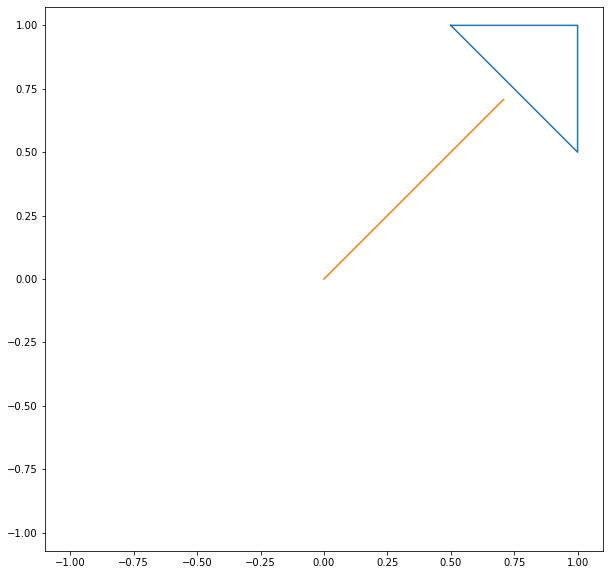

False

In [3]:
p = Polygon([(0,1), (1,0), (1,1)])
l = LineString([(0,0), (1,0)])

p_change = shapely.affinity.scale(p, xfact=0.5, yfact=0.5, origin=(1, 1))
l_change = shapely.affinity.rotate(l, angle=45, origin=(0,0))

plot_space(l_change, p_change)

l_change.intersects(p_change)

In [62]:
class Obstacle:
    def __init__(self, polygon):
        self.polygon = polygon
        self.modified_polygon = polygon
        
    def rotate(self, angle):
        self.modified_polygon = shapely.affinity.rotate(self.polygon, angle, origin="centroid")
    
    def translate(self, x, y):
        self.modified_polygon = shapely.affinity.translate(self.polygon, x, y)
        
    
class Dof1_spin_robot:
    def __init__(self, length=1, min_angle=0, max_angle=360):
        self.length = length
        self.min_angle, self.max_angle = angle_range_correct(min_angle, max_angle) 
        self.start_config = LineString([(0, 0), (length, 0)])
        
    def rotate(self, angle):
        return shapely.affinity.rotate(self.start_config, angle, origin=[0, 0])
        

class Dof1_spin_space:
    def __init__(self, robot, obstacle):
        self.robot = robot
        self.obstacle = obstacle
        
    def sample_conf(self, robot_angle):
        if self.robot.rotate(robot_angle).intersects(self.obstacle.modified_polygon):
            return False
        
        else:
            return True
        
    def rotate_obstacle(self, obstacle_angle):
        self.obstacle.rotate(obstacle_angle)
        
    def translate_obstacle(self, x, y):
        self.obstacle.translate(x, y)
    
    def sample_rotate_obstacle(self, obstacle_angle, num_samples="AUTO"):
        
        if num_samples == "AUTO":
            num_samples = 3 * (self.robot.max_angle - self.robot.min_angle)
        
        self.rotate_obstacle(obstacle_angle)
        sample_angles = list(np.linspace(self.robot.min_angle,
                                         self.robot.max_angle,
                                         endpoint=False,
                                         num=num_samples))
        
        free_space = {sample_angle: int(self.sample_conf(sample_angle)) for sample_angle in sample_angles}
        
        return free_space
    
    def sample_translate_obstacle(self, x, y, num_samples=10 ** 4):
        pass

In [67]:
robot = Dof1_spin_robot()
obstacle = Obstacle(Polygon([[1, 0.25], [.5, 1], [1, 1]]))
dof1_spin_env = Dof1_spin_space(robot, obstacle)

sample_obstacle_angles = np.linspace(0, 360, endpoint=False, num = 360*3)

# obstacle_angle = sample_obstacle_angles[90]

In [68]:
prob_free_space = []

for obstacle_angle in tqdm(sample_obstacle_angles):
    
    dict_sample = dof1_spin_env.sample_rotate_obstacle(obstacle_angle)
    free_conf = [free_angle for free_angle in dict_sample.keys() if dict_sample[free_angle] == 1]
    prob_free_space += free_conf

100%|██████████| 1080/1080 [00:28<00:00, 37.85it/s]


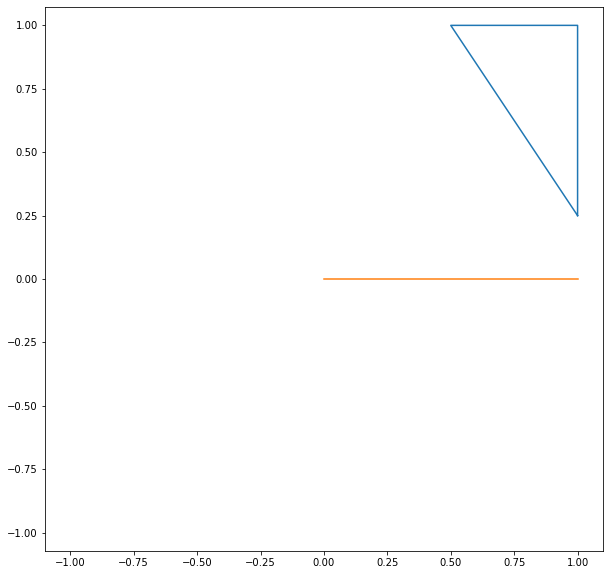

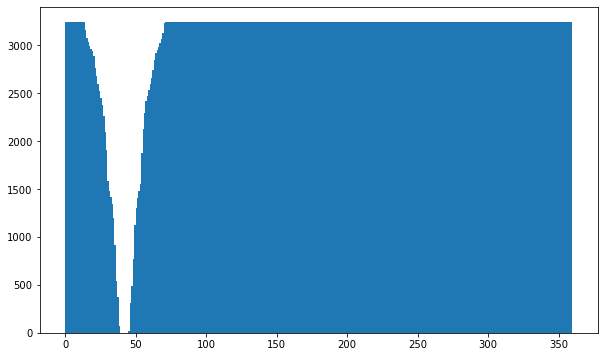

In [70]:
# Polygon([[1, 0.25], [.5, 1], [1, 1]])
# origin centroid
plot_space(robot.start_config, obstacle.polygon)

plt.figure(figsize=(10, 6))
plt.hist(prob_free_space, bins=360)
plt.show()

In [ ]:
plot_space(l_change, p_change)

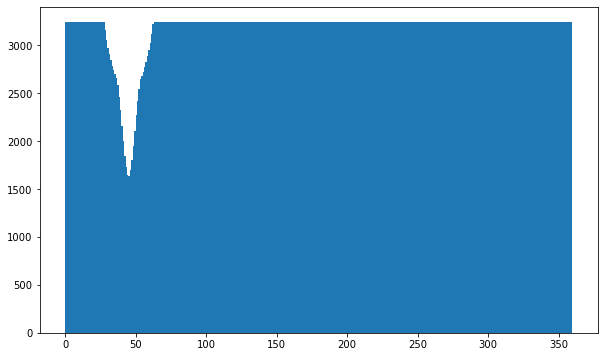

In [66]:
# Polygon([[1, 0.5], [0.5, 1], [1, 1]])
# origin centroid
plt.figure(figsize=(10, 6))
plt.hist(prob_free_space, bins=360)
plt.show()

(-0.1, 2.1, -0.07033683215379001, 1.4770734752295902)

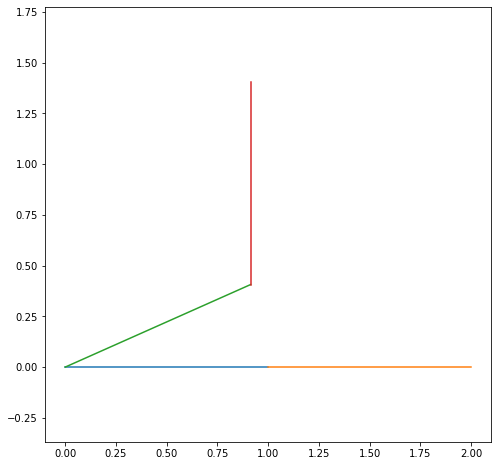

In [121]:
fig, ax = plt.subplots(figsize=(8, 8))

length = [1, 1]

start_config = [LineString([(0, 0), (length[0], 0)]),
                LineString([(length[0], 0), (length[0] + length[1], 0)])]

[ax.plot(*config.xy) for config in start_config]



def new_r(start_config, angle_list=[24, 66]):
    link1 = shapely.affinity.rotate(start_config[0], angle_list[0], origin=[0, 0])
    link2_start = shapely.affinity.rotate(start_config[1], angle_list[0], origin=[0, 0])
    link2_startpoint = list(link2_start.coords)[0]
    link2 = shapely.affinity.rotate(link2_start, angle_list[1], origin=link2_startpoint)

    return [link1, link2]

[ax.plot(*config.xy) for config in new_r(start_config)]

ax.plot(*p_change.exterior.xy)

ax.axis("equal")

In [110]:



def rotate(self, angle_list):
    link1 = shapely.affinity.rotate(self.start_config[0], angle_list[0], origin=[0, 0])
    link2_start = shapely.affinity.rotate(self.start_config[1], angle_list[0], origin=[0, 0])
    link2_startpoint = list(link2_start.coords)[0]
    link2 = shapely.affinity.rotate(link2_start, angle_list[1], origin=link2_startpoint)

    return shapely.affinity.rotate(self.start_config, angle, origin=[0, 0])




(1.7320508075688774, 0.9999999999999999)

In [138]:
# class Obstacle:
#     def __init__(self, polygon):
#         self.polygon = polygon
#         self.modified_polygon = polygon
        
#     def rotate(self, angle):
#         self.modified_polygon = shapely.affinity.rotate(self.polygon, angle, origin="centroid")
    
#     def translate(self, x, y):
#         self.modified_polygon = shapely.affinity.translate(self.polygon, x, y)
        
    
class Dof2_spin_robot:
    def __init__(self, length_list=[0.5, 0.5], min_angle_list=[0, 0], max_angle_list=[360, 360]):
        self.length_list = length_list
        
        angle_list = np.array([list(angle_range_correct(min_angle_list[0], max_angle_list[0])),
                               list(angle_range_correct(min_angle_list[1], max_angle_list[1]))])
        
        self.min_angle_list = list(angle_list[:, 0])
        self.max_angle_list = list(angle_list[:, 1])
        
        self.start_config = [LineString([(0, 0), (length[0], 0)]),
                             LineString([(length[0], 0), (length[0] + length[1], 0)])]
        
    def rotate(self, angle_list):
        link1 = shapely.affinity.rotate(self.start_config[0], angle_list[0], origin=[0, 0])
        link2_start = shapely.affinity.rotate(self.start_config[1], angle_list[0], origin=[0, 0])
        link2_startpoint = list(link2_start.coords)[0]
        link2 = shapely.affinity.rotate(link2_start, angle_list[1], origin=link2_startpoint)
        
        return [link1, link2]
    
    def rotate_w(self, angle_list):
        link1 = shapely.affinity.rotate(self.start_config[0], angle_list[0], origin=[0, 0])
        link2_start = shapely.affinity.rotate(self.start_config[1], angle_list[0], origin=[0, 0])
        link2_startpoint = list(link2_start.coords)[0]
        link2 = shapely.affinity.rotate(link2_start, angle_list[1], origin=link2_startpoint)
        
        return [link1, link2]
        

class Dof2_spin_space:
    def __init__(self, robot, obstacle):
        self.robot = robot
        self.obstacle = obstacle
        
    def sample_conf(self, robot_angle):
        
        link1, link2 = self.robot.rotate(robot_angle)
        
        if link1.intersects(self.obstacle.modified_polygon) or link2.intersects(self.obstacle.modified_polygon):
            return False
        
        else:
            return True
        
    def rotate_obstacle(self, obstacle_angle):
        self.obstacle.rotate(obstacle_angle)
        
    def translate_obstacle(self, x, y):
        self.obstacle.translate(x, y)
    
    def sample_rotate_obstacle(self, obstacle_angle, num_samples= "AUTO"):
        
        if num_samples == "AUTO":
            num_samples_1 = 1 * (self.robot.max_angle_list[0] - self.robot.min_angle_list[0])
            num_samples_2 = 1 * (self.robot.max_angle_list[1] - self.robot.min_angle_list[1])            
        
        self.rotate_obstacle(obstacle_angle)
        
        sample_angles_1 = list(np.linspace(self.robot.min_angle_list[0],
                                           self.robot.max_angle_list[0],
                                           endpoint=False,
                                           num=num_samples_1))
        
        sample_angles_2 = list(np.linspace(self.robot.min_angle_list[1],
                                           self.robot.max_angle_list[1],
                                           endpoint=False,
                                           num=num_samples_1))
        
        
        sample_angles = itertools.product(sample_angles_1, sample_angles_2)
        
        free_space = {sample_angle: int(self.sample_conf(sample_angle)) for sample_angle in sample_angles}
        
        return free_space
    
    
    def sample_translate_obstacle(self, x, y, num_samples=10 ** 4):
        pass

In [205]:
count_free_conf = Counter()

robot = Dof2_spin_robot()

obstacle_2 = Obstacle(Polygon([[1, 0.5], [.5, 1], [1, 1]]))
obstacle_1 = Obstacle(Polygon([[1, 0.25], [.5, 1], [1, 1]]))

dof1_spin_env = Dof2_spin_space(robot, obstacle_2)

sample_total = 180 ## no of times the environment is sampled

sample_obstacle_angles = np.linspace(0, 360, endpoint=False, num = sample_total)

# obstacle_angle = sample_obstacle_angles[90]

prob_free_space = []

for obstacle_angle in tqdm(sample_obstacle_angles):
    
    dict_sample = dof1_spin_env.sample_rotate_obstacle(obstacle_angle)
    
    num_free_conf = [free_angle for free_angle in dict_sample.keys() if dict_sample[free_angle] == 1]
    count_free_conf.update(num_free_conf)
    
#     prob_free_space += free_conf

100%|██████████| 180/180 [32:35<00:00, 10.86s/it]


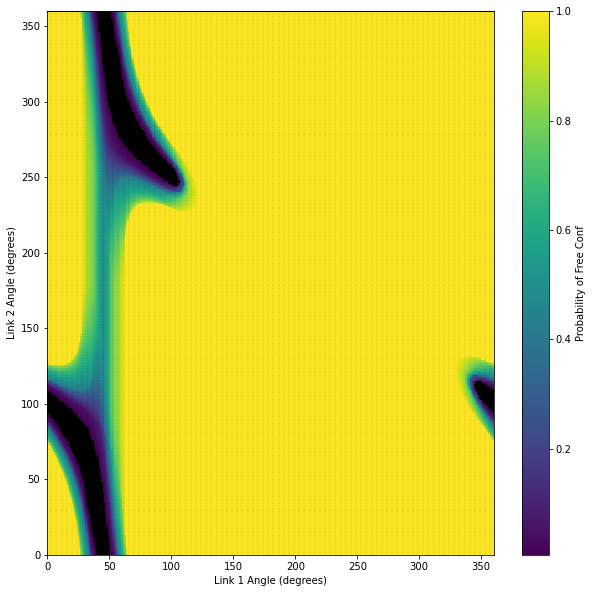

In [231]:
fig, ax = plt.subplots(figsize= (10, 10))

x = np.array(list(count_free_conf.keys()))[:, 0]
y = np.array(list(count_free_conf.keys()))[:, 1]
c = np.array(list(count_free_conf.values())) / sample_total


cm = plt.cm.get_cmap('viridis')

sc = ax.scatter(x, y, c=c, cmap=cm, s=1, marker="s")

# ax.legend()


ax.set_facecolor('k')

plt.xlabel("Link 1 Angle (degrees)")
plt.ylabel("Link 2 Angle (degrees)")

plt.xlim(0, 360)
plt.ylim(0, 360)


# import matplotlib.pyplot as plt


plt.colorbar(sc, label="Probability of Free Conf")
plt.show()

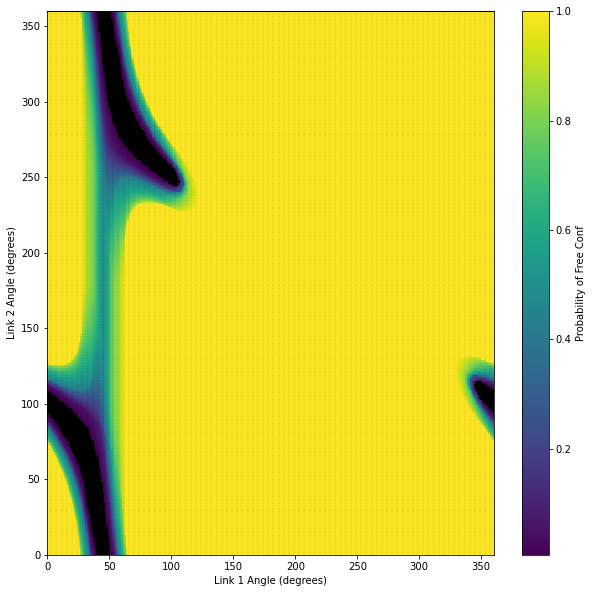

In [243]:
fig, ax = plt.subplots(figsize= (10, 10))

x = np.array(list(count_free_conf.keys()))[:, 0]
y = np.array(list(count_free_conf.keys()))[:, 1]

c = np.array(list(count_free_conf.values())) / sample_total


cm = plt.cm.get_cmap('viridis')

sc = ax.scatter(x, y, c=c, cmap=cm, s=1, marker="s")

# ax.legend()


ax.set_facecolor('k')

plt.xlabel("Link 1 Angle (degrees)")
plt.ylabel("Link 2 Angle (degrees)")

plt.xlim(0, 360)
plt.ylim(0, 360)


# import matplotlib.pyplot as plt


plt.colorbar(sc, label="Probability of Free Conf")
plt.show()